# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 12

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

In [50]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$ \nabla Q(w) = -2X^T(y - Xw) $

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [51]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%autoreload 2

import numpy as np

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

In [53]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [54]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [55]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:   https://contest.yandex.ru/contest/54610/run-report/95354997/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95355213/


* **MomentumDescent**:https://contest.yandex.ru/contest/54610/run-report/95355332/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95355426/


* **LinearRegression**:https://contest.yandex.ru/contest/54610/run-report/95801652/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [57]:
data = pd.read_csv('autos.csv')

In [58]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<AxesSubplot:xlabel='price', ylabel='Count'>

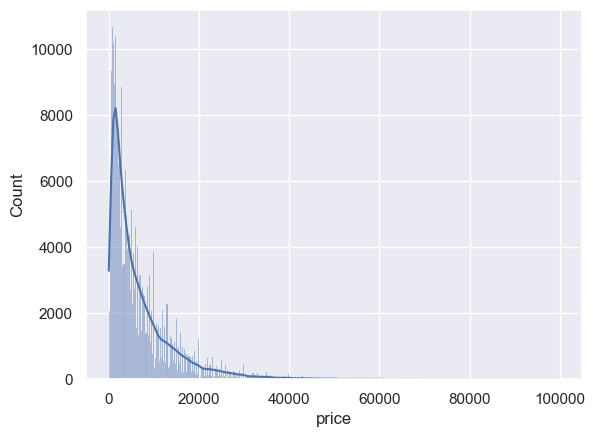

In [59]:
sns.histplot(data['price'], kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

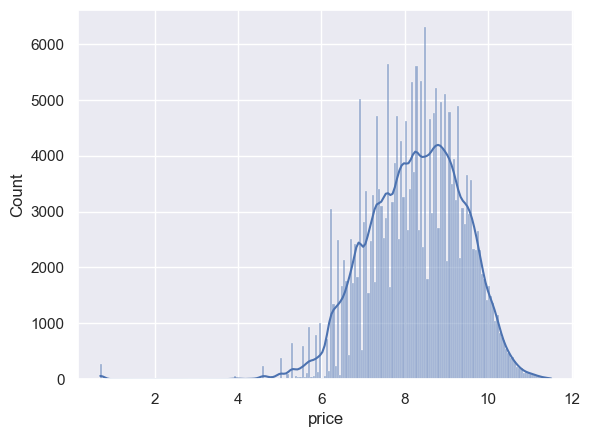

In [60]:
sns.histplot(np.log1p(data['price']), kde=True)

***Мжно заметить, что в целевой переменной много выбросов. Логарифмирование позволит уменьшить влияние выбросов и сделать распределение более похожим на нормальное***

In [61]:
categorical = ['brand', 'vehicleType', 'fuelType', 'model']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = [ 'notRepairedDamage', 'gearbox']

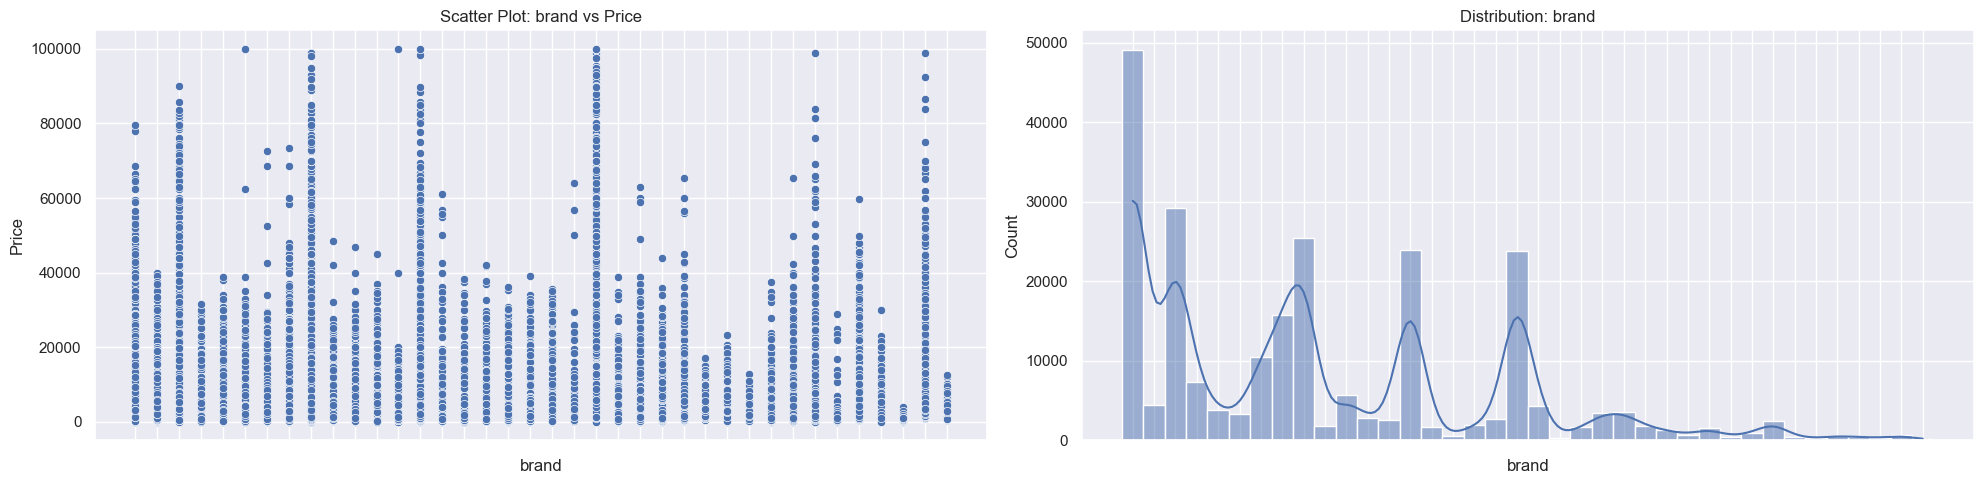

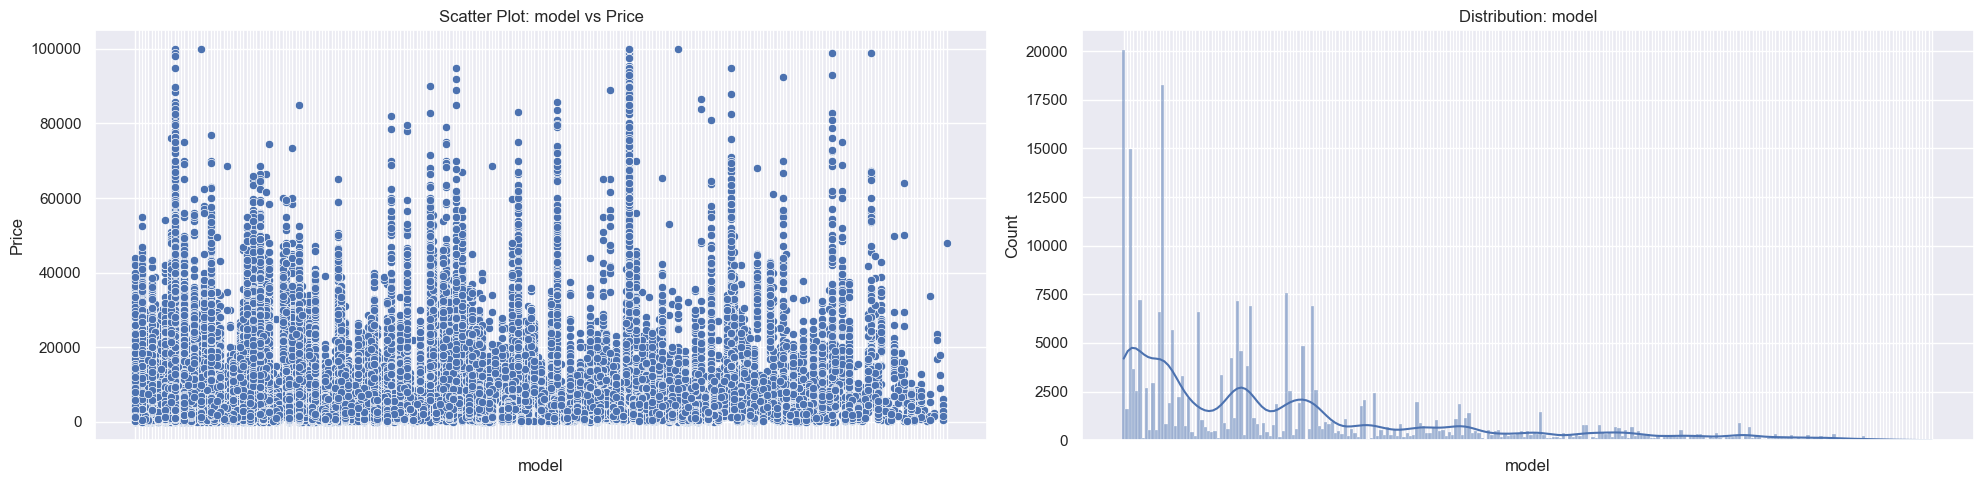

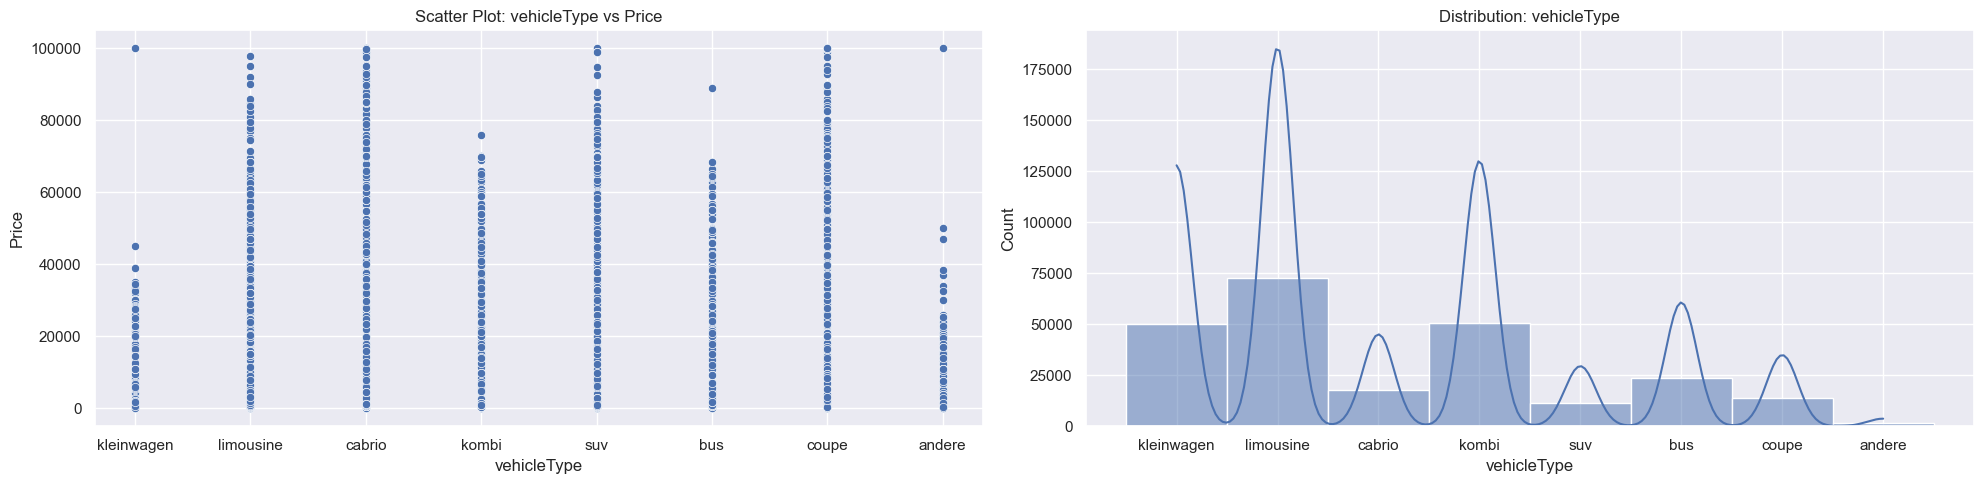

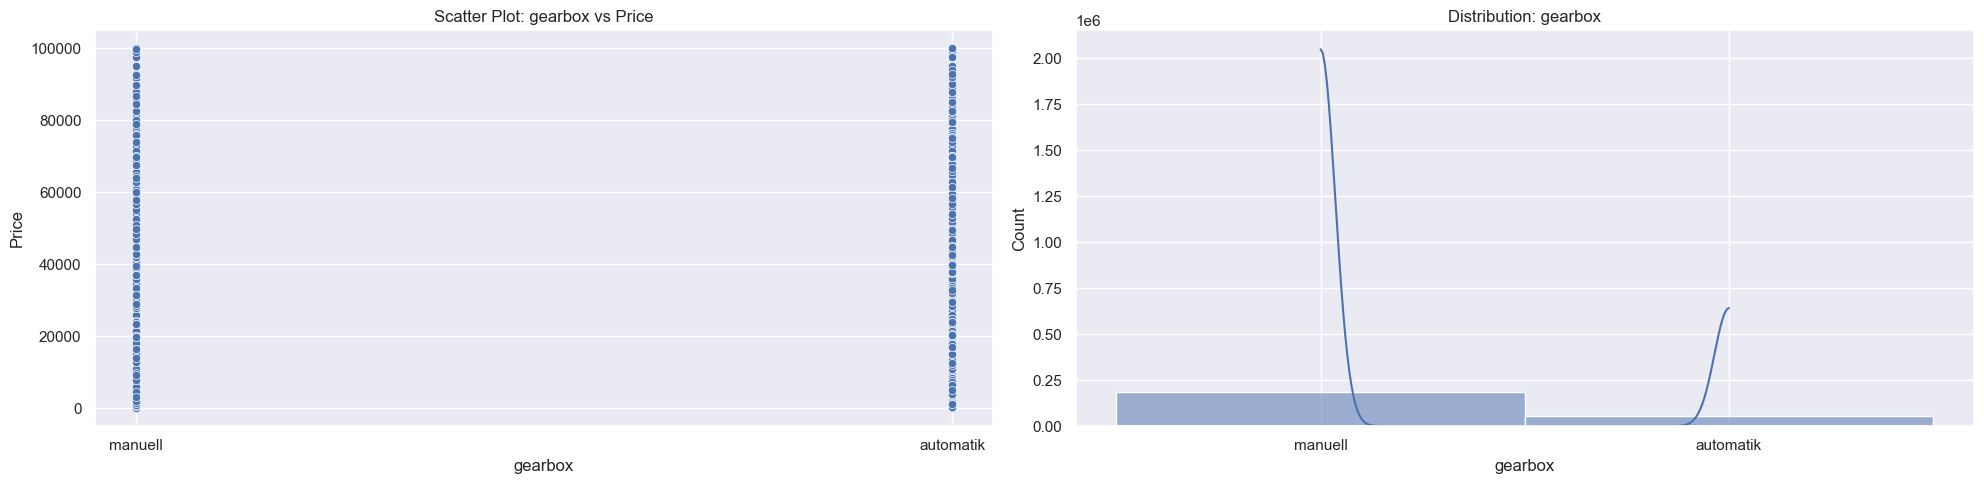

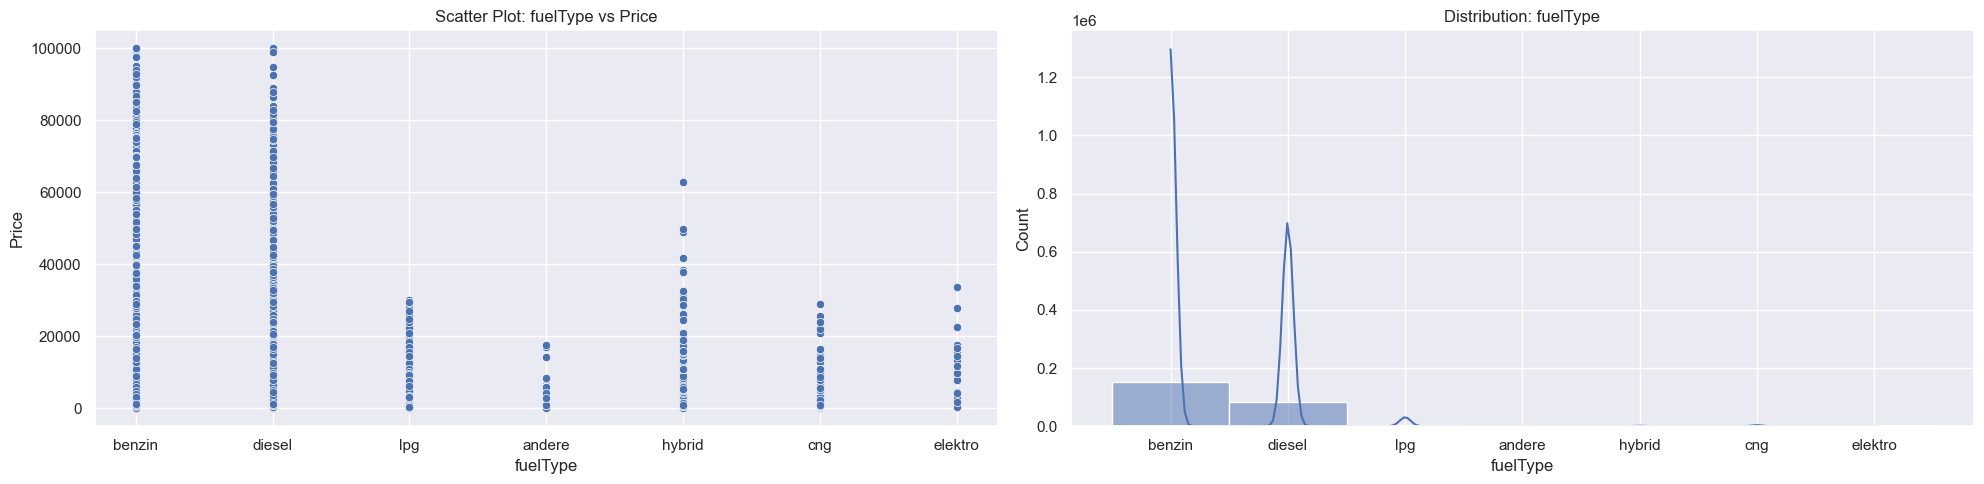

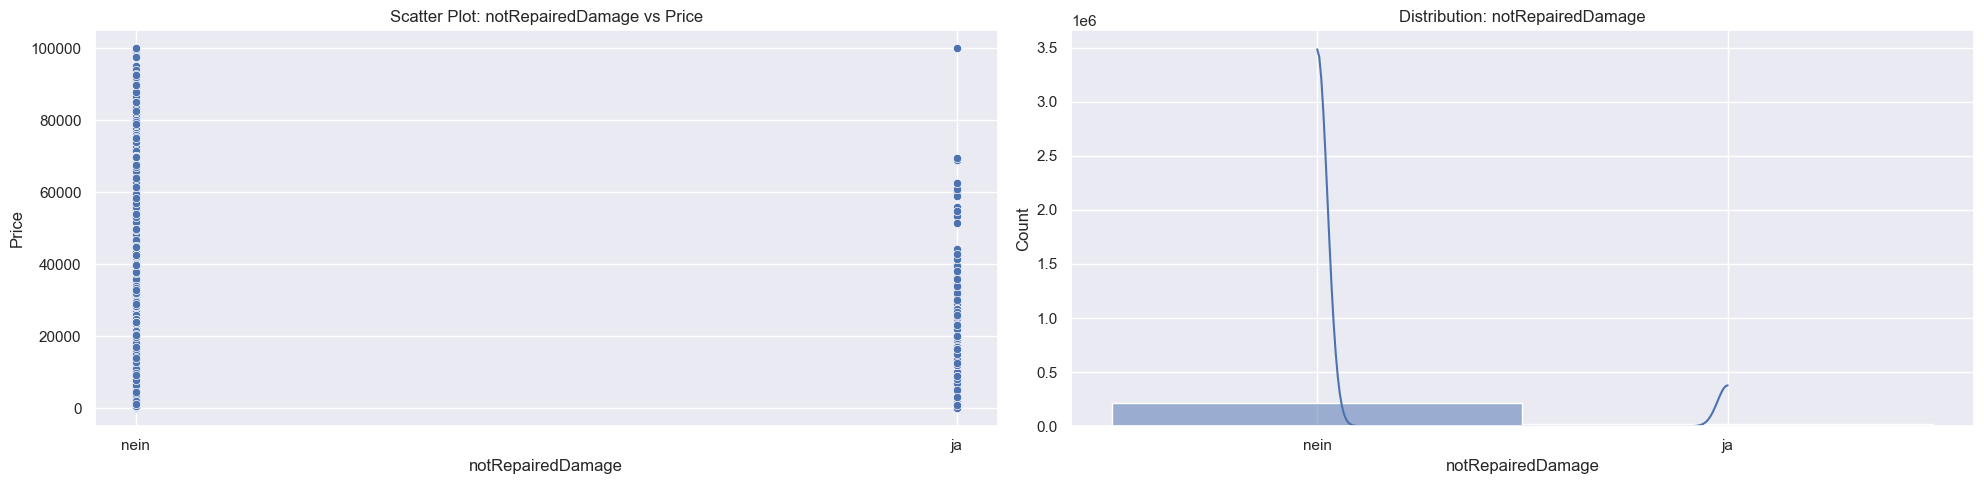

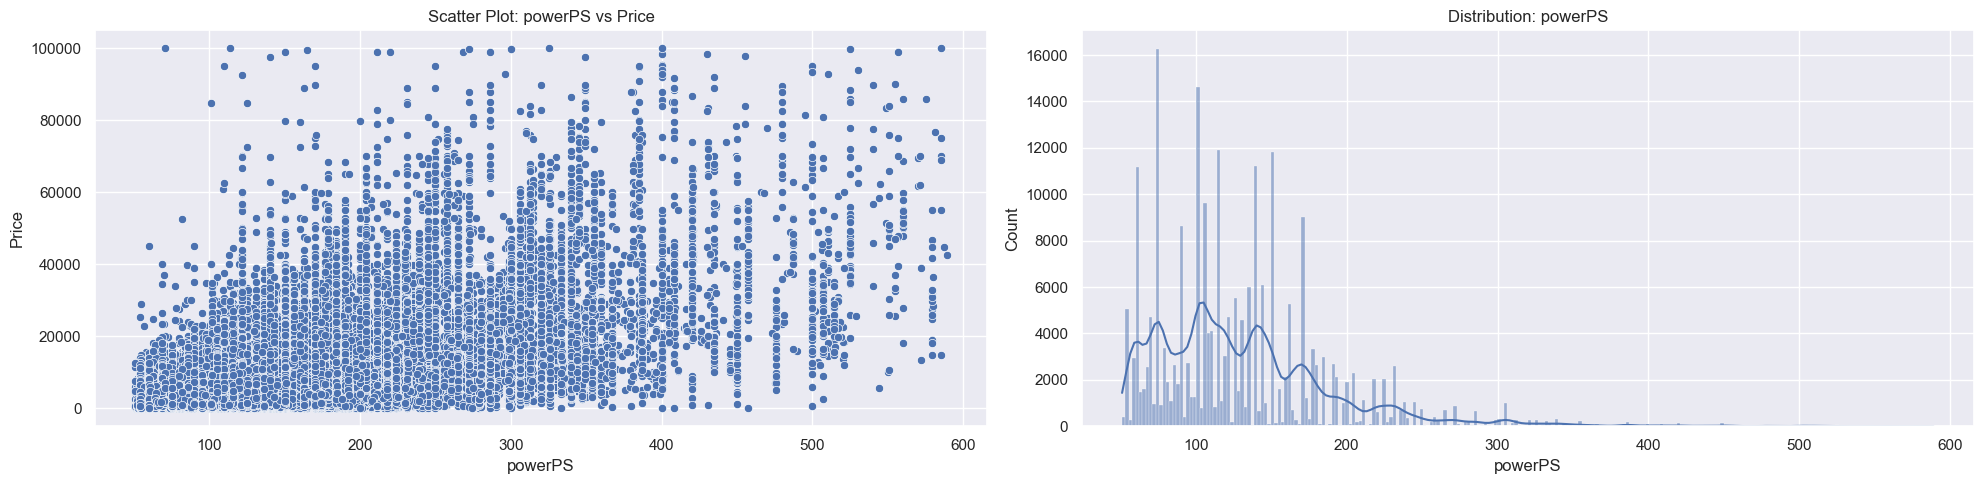

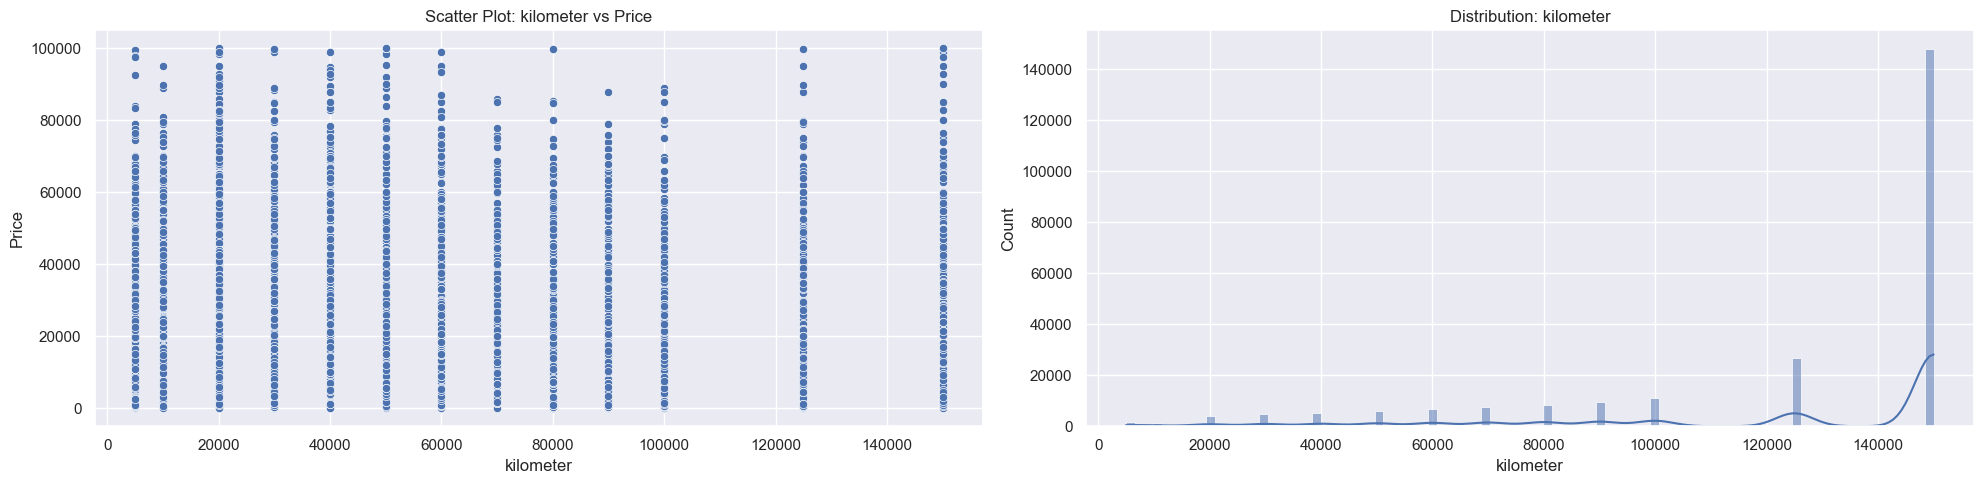

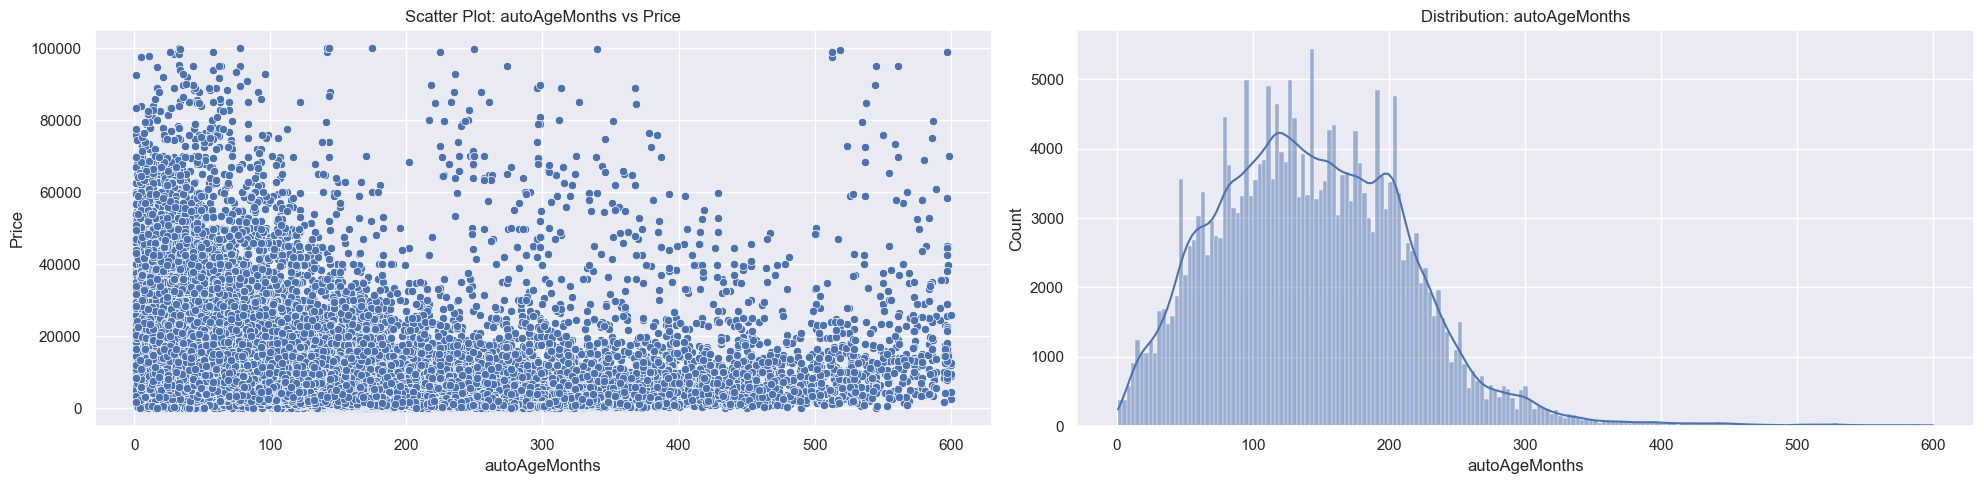

In [62]:
for feature in data.columns:
    if feature != 'price':
        fig, axs = plt.subplots(1, 2, figsize=(20, 5))

        sns.scatterplot(x=feature, y="price", data=data, ax=axs[0])
        axs[0].set_title(f"Scatter Plot: {feature} vs Price")
        axs[0].set_ylabel('Price')

        sns.histplot(data=data, x=feature, kde=True, ax=axs[1])
        axs[1].set_title(f"Distribution: {feature}")
        axs[1].set_ylabel('Count')

        # Убираем подписи по оси x если признак категориальный и его уникальных значений больше 8
        if feature in categorical and data[feature].nunique() > 8:
            axs[0].set_xticklabels([])
            axs[1].set_xticklabels([])

        plt.tight_layout()
        plt.show()

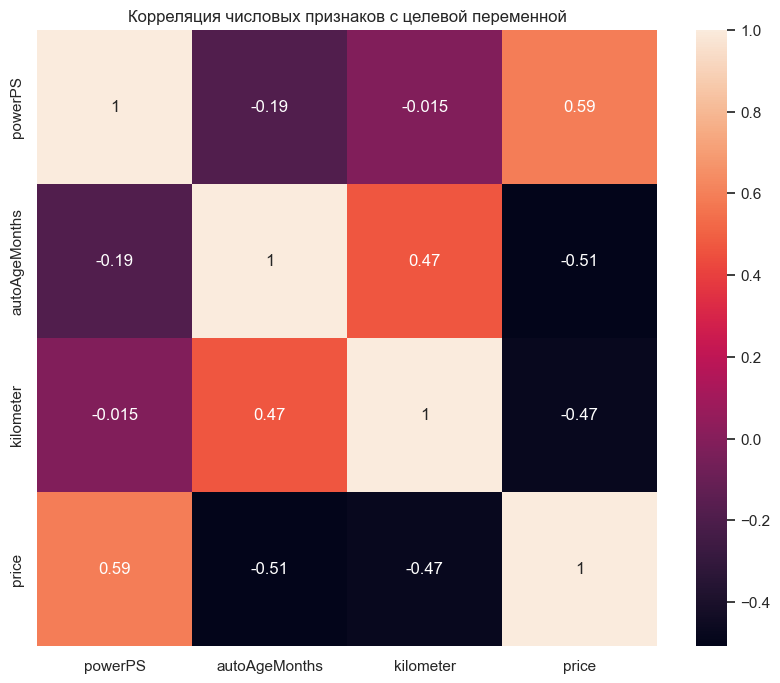

In [63]:
def draw_corr(data, numeric):
    correlation_matrix = data[numeric + ['price']].corr()

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numeric + ['price']].corr(), annot=True)
    plt.title('Корреляция числовых признаков с целевой переменной')
    plt.show()
draw_corr(data, numeric)

***Можно заметить, что категориальные признаки по большей части помогают предсказать, к какому ценовому сегменту будет относиться авто (кроме типа коробки передач по  ней визуально не видно). Численные признаки также визуально имеют линейную взаимосвязь с целевой переменной, поэтому их выкидывать не будем. Однако также заметим, что в них присутсвует большое количество выбросов, что видно по гистограммам, поэтому избавимся от наблюдений с сильными выбросами***

In [64]:
# отчистим данные от выбросов
IQR_data = {}

for feature in numeric:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    IQR_data[feature] = (Q1, Q3, IQR)
bounds = {}

for feature, dat in IQR_data.items():
    Q1, Q3, IQR = dat
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds[feature] = (lower_bound, upper_bound)

for feature, (lower_bound, upper_bound) in bounds.items():
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    
#заменим значения в признаках notRepairedDamage и gearbox на 0 и 1, так как они бинарные

data['notRepairedDamage'] = data['notRepairedDamage'].map({'ja': 1, 'nein': 0})
data['gearbox'] = data['gearbox'].map({'manuell': 1, 'automatik': 0})


***Проверим, что мы не ухудшили корреляцию, выкинув слишком большое количество наблюдений***

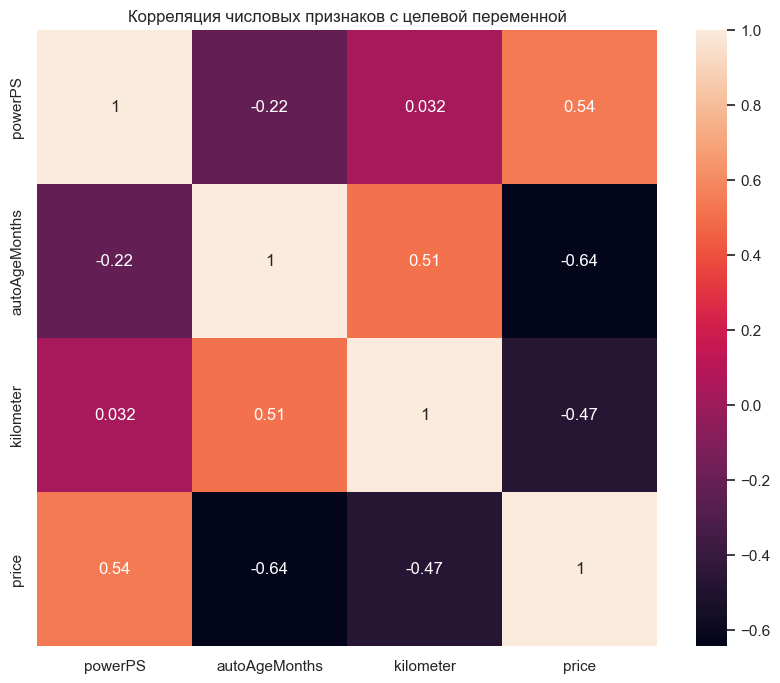

In [65]:
draw_corr(data, numeric)

***Корреляция сильно не ухудшилась, а где-то даже значительно выросла***

In [66]:
for k in data[categorical].columns:
    value_counts = data[k].value_counts()
    less_than_100 = value_counts[value_counts < 100]
    print(f"Values in {k} with less than 100 observations:\n{less_than_100}\n")

Values in brand with less than 100 observations:
lada    96
Name: brand, dtype: int64

Values in vehicleType with less than 100 observations:
Series([], Name: vehicleType, dtype: int64)

Values in fuelType with less than 100 observations:
andere     29
elektro    18
Name: fuelType, dtype: int64

Values in model with less than 100 observations:
note                  99
outlander             99
g_klasse              94
kadett                94
sirion                93
defender              92
exeo                  89
navara                87
cx_reihe              85
discovery             83
spark                 83
aveo                  82
antara                76
justy                 76
900                   76
juke                  74
niva                  73
cl                    71
kalos                 70
s_type                70
r19                   65
range_rover_sport     56
range_rover_evoque    55
mustang               53
911                   52
crossfire             51
rang

***Редкие категории в этих данных выкидывать нельзя, так как, высока вероятность ошибиться и выкинуть категорию, которая могла бы предсказывать цену. По графикам видно, что таких категорий много (например, электрокары, которые попали в категогорию редко встречающихся)***

In [67]:
data['price'].corr(data['gearbox'])

-0.31109352889341435

***Видим, кто взаимосвязь с типом коробки передач, хоть и не сильная, но достаточная, чтобы ее не выкидывать***

In [68]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = np.log1p(data['price'])

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [70]:
column_names = column_transformer.get_feature_names_out()  # Get the new column names after transformations
x = pd.DataFrame(x.toarray(), columns=column_names)

In [71]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую (80%) и временную выборки (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

# Разделение временной выборки на валидационную (50%) и тестовую (50%)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=102)

# Теперь у нас есть x_train_temp (80% данных), x_valid (10% данных) и x_test (10% данных)
# Использовался GPT
print(x_valid.shape[0]/x.shape[0])
print(x_test.shape[0]/x.shape[0])

0.10000044686945603
0.10000044686945603


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [72]:
np.random.seed(10)
from sklearn.metrics import r2_score
res = []
for descent in ['full', 'stochastic','momentum', 'adam']:
    
    best_loss = np.inf
            
    for lamda_ in np.logspace(-6, 1, 10):
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_' : lamda_}}
        
        regression = LinearRegression(
        descent_config=descent_config)
        
        regression.fit(x_train.values, y_train.values)
        loss = regression.calc_loss(x_valid.values, y_valid.values)
        
        if loss < best_loss:
            method = descent
            best_loss = loss
            best_lambda = lamda_
            best_config = descent_config
            best_iter = (len(regression.loss_history) - 1)
            
            regression = LinearRegression(descent_config=descent_config)
            regression.fit(x_test.values, y_test.values)
            best_r2 = r2_score(y_test.values, regression.predict(x_test.values))
    
    res.append({
            'method': method,
            'best_lambda': best_lambda,
            'best_loss': best_loss,
            'best_r2': best_r2,
            'best_iter': best_iter})

In [73]:
res_df = pd.DataFrame(res)
res_df

,method,best_lambda,best_loss,best_r2,best_iter
0,full,1.668101,0.292027,0.755868,61
1,stochastic,0.278256,0.476787,0.590135,137
2,momentum,1.668101,0.240405,0.798078,158
3,adam,10.000000,0.230407,0.809983,197


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [74]:
ans = []
for k in range(len(res)):
    descent_config = {
            'descent_name': res[k]['method'],
            'kwargs': {'lambda_': res[k]['best_lambda'], 'dimension':x.shape[1]}
        }
    model = LinearRegression(descent_config)

    model.fit(x_train.values, y_train.values)
    
    ans.append(model.loss_history)


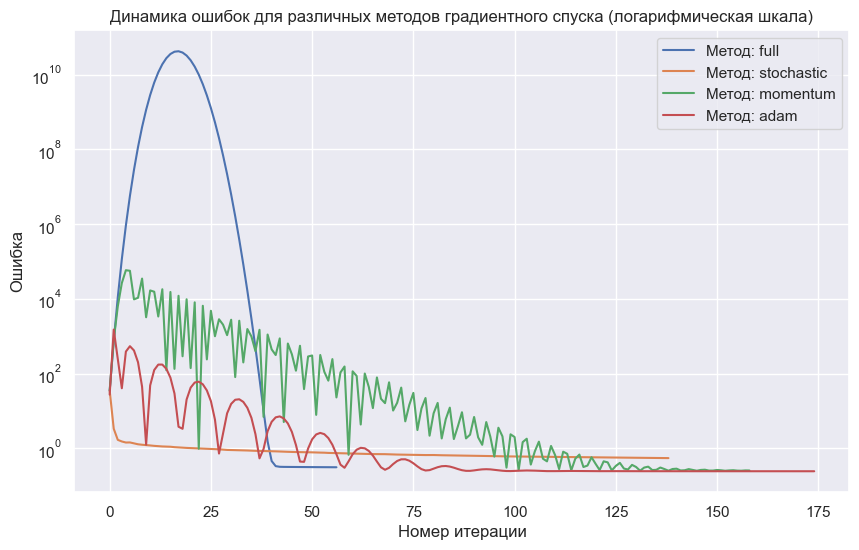

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

methods = ['full', 'stochastic', 'momentum', 'adam']

# Визуализируем историю ошибок с использованием логарифмической шкалы по оси Y
for i, loss_history in enumerate(ans):
    plt.plot(loss_history, label=f'Метод: {methods[i]}')

plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.title('Динамика ошибок для различных методов градиентного спуска (логарифмическая шкала)')
plt.yscale('log')  # Задаем логарифмический масштаб для оси Y
plt.legend()
plt.show()

1. **Метод full** - можем наблюдать первончальный "взрыв" ошибки. То есть ошибка изначально даже не уменьшается, а увеличивается, а потом быстро падает. Это можно связать с тем, что, так как у нас нет никакого сдерживающего механизма, как в adam и мы движемся по антиградиенту, изначально мы даже перелетаем минимум и увеличиваем ошибку, но потом со временем спуск движется в правильном направлении и сходится к минимуму.
2. **Метод stochastic** - можно заметить, что из-за своих особенностей (подсчета градиента на выборке) мы быстро уменьшаем ошибку до некоторых значений (быстрее чем остальные способы), но дальше мы сходимся крайне медленно и так и не достигаем минимума, так как считаем градиент по выборке.
3. **Метод momentum** - видим более плавное, равномерное снижение к минимуму, которое объясняется тем, что градиент не так сильно разбрасывает по сторонам и он медленно, но верно идет к минимуму.
4. **Метод adam** - Adam, как и momentum, демонстрирует более плавное уменьшение ошибки, хотя и с небольшими колебаниями. Это может быть связано с адаптивной скоростью обучения, которая позволяет этому методу эффективно настраиваться на различные шаблоны в данных.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

{'batch_size': 5, 'avg_time': 6.249292302131653, 'avg_iterations': 188.0}
{'batch_size': 15, 'avg_time': 5.720010280609131, 'avg_iterations': 172.7}
{'batch_size': 25, 'avg_time': 5.292752361297607, 'avg_iterations': 159.6}
{'batch_size': 35, 'avg_time': 4.590030694007874, 'avg_iterations': 138.3}
{'batch_size': 45, 'avg_time': 4.010280346870422, 'avg_iterations': 120.5}
{'batch_size': 55, 'avg_time': 3.8020370244979858, 'avg_iterations': 114.0}
{'batch_size': 65, 'avg_time': 3.2698596000671385, 'avg_iterations': 98.2}
{'batch_size': 75, 'avg_time': 3.6180288553237916, 'avg_iterations': 108.4}
{'batch_size': 85, 'avg_time': 3.2522067546844484, 'avg_iterations': 97.9}
{'batch_size': 95, 'avg_time': 3.4395060777664184, 'avg_iterations': 103.2}
{'batch_size': 105, 'avg_time': 3.1940622091293336, 'avg_iterations': 96.0}
{'batch_size': 115, 'avg_time': 3.076276969909668, 'avg_iterations': 92.3}
{'batch_size': 125, 'avg_time': 3.1322275161743165, 'avg_iterations': 94.0}
{'batch_size': 135, '

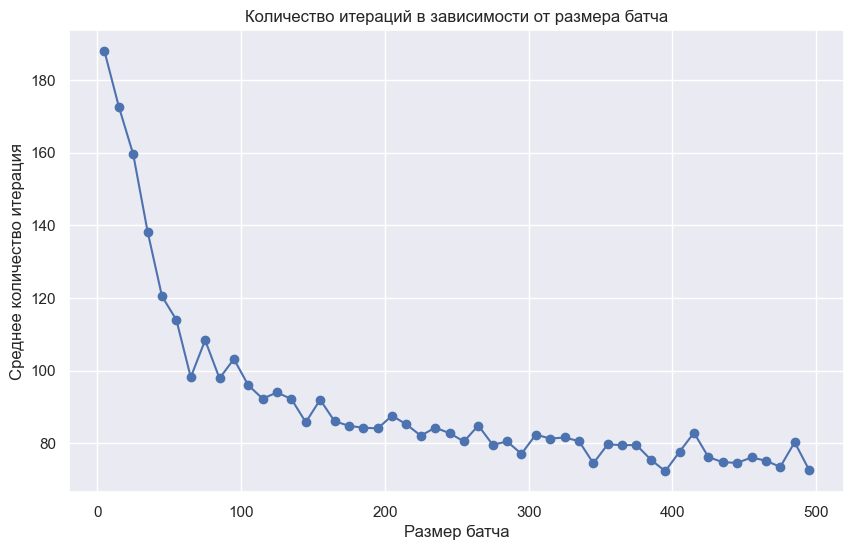

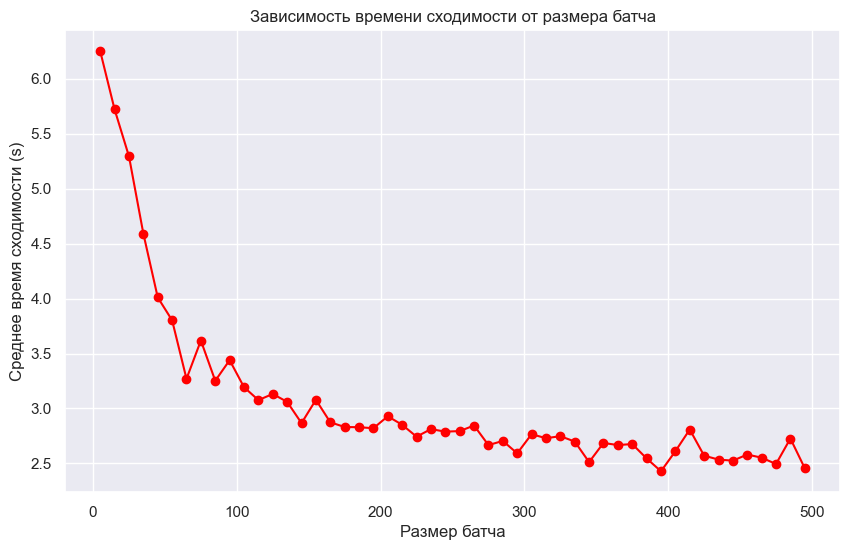

In [76]:
import numpy as np
import time
from sklearn.metrics import r2_score
np.random.seed(11)

batch_sizes = np.arange(5, 500, 10) 
k = 10  # Количество запусков для усреднения

results = []

for batch_size in batch_sizes:
    time_taken = []
    iterations = []
    
    for i in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': x_train.shape[1],
                'lambda_': res[1]['best_lambda'], 
                'batch_size': batch_size
            }
        }

        regression = LinearRegression(descent_config=descent_config)
        
        start_time = time.time()
        regression.fit(x_train.values, y_train.values)
        end_time = time.time()
        
        time_taken.append(end_time - start_time)
        iterations.append((len(regression.loss_history)-1))
        
    # Средние значения по запускам
    avg_time = np.mean(time_taken)
    avg_iterations = np.mean(iterations)

    results.append({
        'batch_size': batch_size,
        'avg_time': avg_time,
        'avg_iterations': avg_iterations
    })

# Выведем результаты
for result in results:
    print(result)

# Построение графиков
import matplotlib.pyplot as plt

# График зависимости количества шагов до сходимости от размера батча
plt.figure(figsize=(10, 6))
plt.plot([r['batch_size'] for r in results], [r['avg_iterations'] for r in results], marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итерация')
plt.title('Количество итераций в зависимости от размера батча')
plt.grid(True)
plt.show()

# График зависимости времени до сходимости от размера батча
plt.figure(figsize=(10, 6))
plt.plot([r['batch_size'] for r in results], [r['avg_time'] for r in results], marker='o', color='red')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время сходимости (s)')
plt.title('Зависимость времени сходимости от размера батча')
plt.grid(True)
plt.show()

***Чем меньше берется размер батча, тем большее количество итераций требуется совершить для попадания в минимум, так как как в таком случае бОльшая вероятность взятия нерепрезентативной выборки. Градиент будет долго "блуждать" около минимима. Так как итераций потребуется больше, то и времени затребуется больше. Это объясняет отрицательную взимосвзяь между размером батча и веременем/количеством итераций до сходимости. В нашем случае оптимальным количеством наблюдений является 200 штук, так как на нем достигается почти наименьшее количество итераций, а дальнейшее увеличение батча не приводит к значительному уменьшению итераций.***

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

$$ \nabla Q(w) = \frac{2}{l}X^T(Xw - y) + \mu w $$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96292578/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [77]:
np.random.seed(12)
res_reg = []
for descent in ['full', 'stochastic','momentum', 'adam']:
    
    best_loss = np.inf
            
    for lamda_ in np.logspace(-6, 1, 10):  
        for mu_ in np.logspace(-6, 1, 10):
            descent_config = {
                'descent_name': descent,
                'regularized': True, 
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'lambda_' : lamda_,
                    'mu': mu_}}
            
            regression = LinearRegression(
            descent_config=descent_config)
            
            regression.fit(x_train.values, y_train.values)
            loss = regression.calc_loss(x_valid.values, y_valid.values)
            
            if loss < best_loss:
                method = descent
                best_loss = loss
                best_lambda = lamda_
                best_mu = mu_
                best_config = descent_config
                best_iter = (len(regression.loss_history) - 1)
                
    regression = LinearRegression(descent_config=best_config)
    regression.fit(x_test.values, y_test.values)
    best_r2_test = r2_score(y_test.values, regression.predict(x_test.values))
    best_r2_train = r2_score(y_train.values, regression.predict(x_train.values))
    
    res_reg.append({
            'method': method,
            'best_lambda': best_lambda,
            'best_mu': best_mu,
            'best_loss': best_loss,
            'best_r2_test': best_r2_test,
            'best_r2_train': best_r2_train,
            'best_iter': best_iter})

In [78]:
res_reg_df = pd.DataFrame(res_reg)
print('Без регуляризации')
print(res_df)
print()
print('С регуляризацией')
print(res_reg_df)


Без регуляризации
       method  best_lambda  best_loss   best_r2  best_iter
0        full     1.668101   0.292027  0.755868         61
1  stochastic     0.278256   0.476787  0.590135        137
2    momentum     1.668101   0.240405  0.798078        158
3        adam    10.000000   0.230407  0.809983        197

С регуляризацией
       method  best_lambda   best_mu  best_loss  best_r2_test  best_r2_train  \
0        full     1.668101  0.000215   0.338717      0.718056       0.705944   
1  stochastic     0.278256  0.000036   0.816067      0.230387       0.238545   
2    momentum     1.668101  0.000215   0.239433      0.800705       0.787272   
3        adam    10.000000  0.000001   0.230482      0.810182       0.795299   

   best_iter  
0        183  
1        229  
2        248  
3        150  


In [79]:
ans_reg = []
for k in range(len(res_reg)):
    descent_config = {
            'descent_name': res_reg[k]['method'],
            'regularized': True,
            'kwargs': {'lambda_': res_reg[k]['best_lambda'], 'dimension':x.shape[1], 'mu': res_reg[k]['best_mu']}
        }
    model = LinearRegression(descent_config)

    model.fit(x_train.values, y_train.values)
    
    ans_reg.append(model.loss_history)

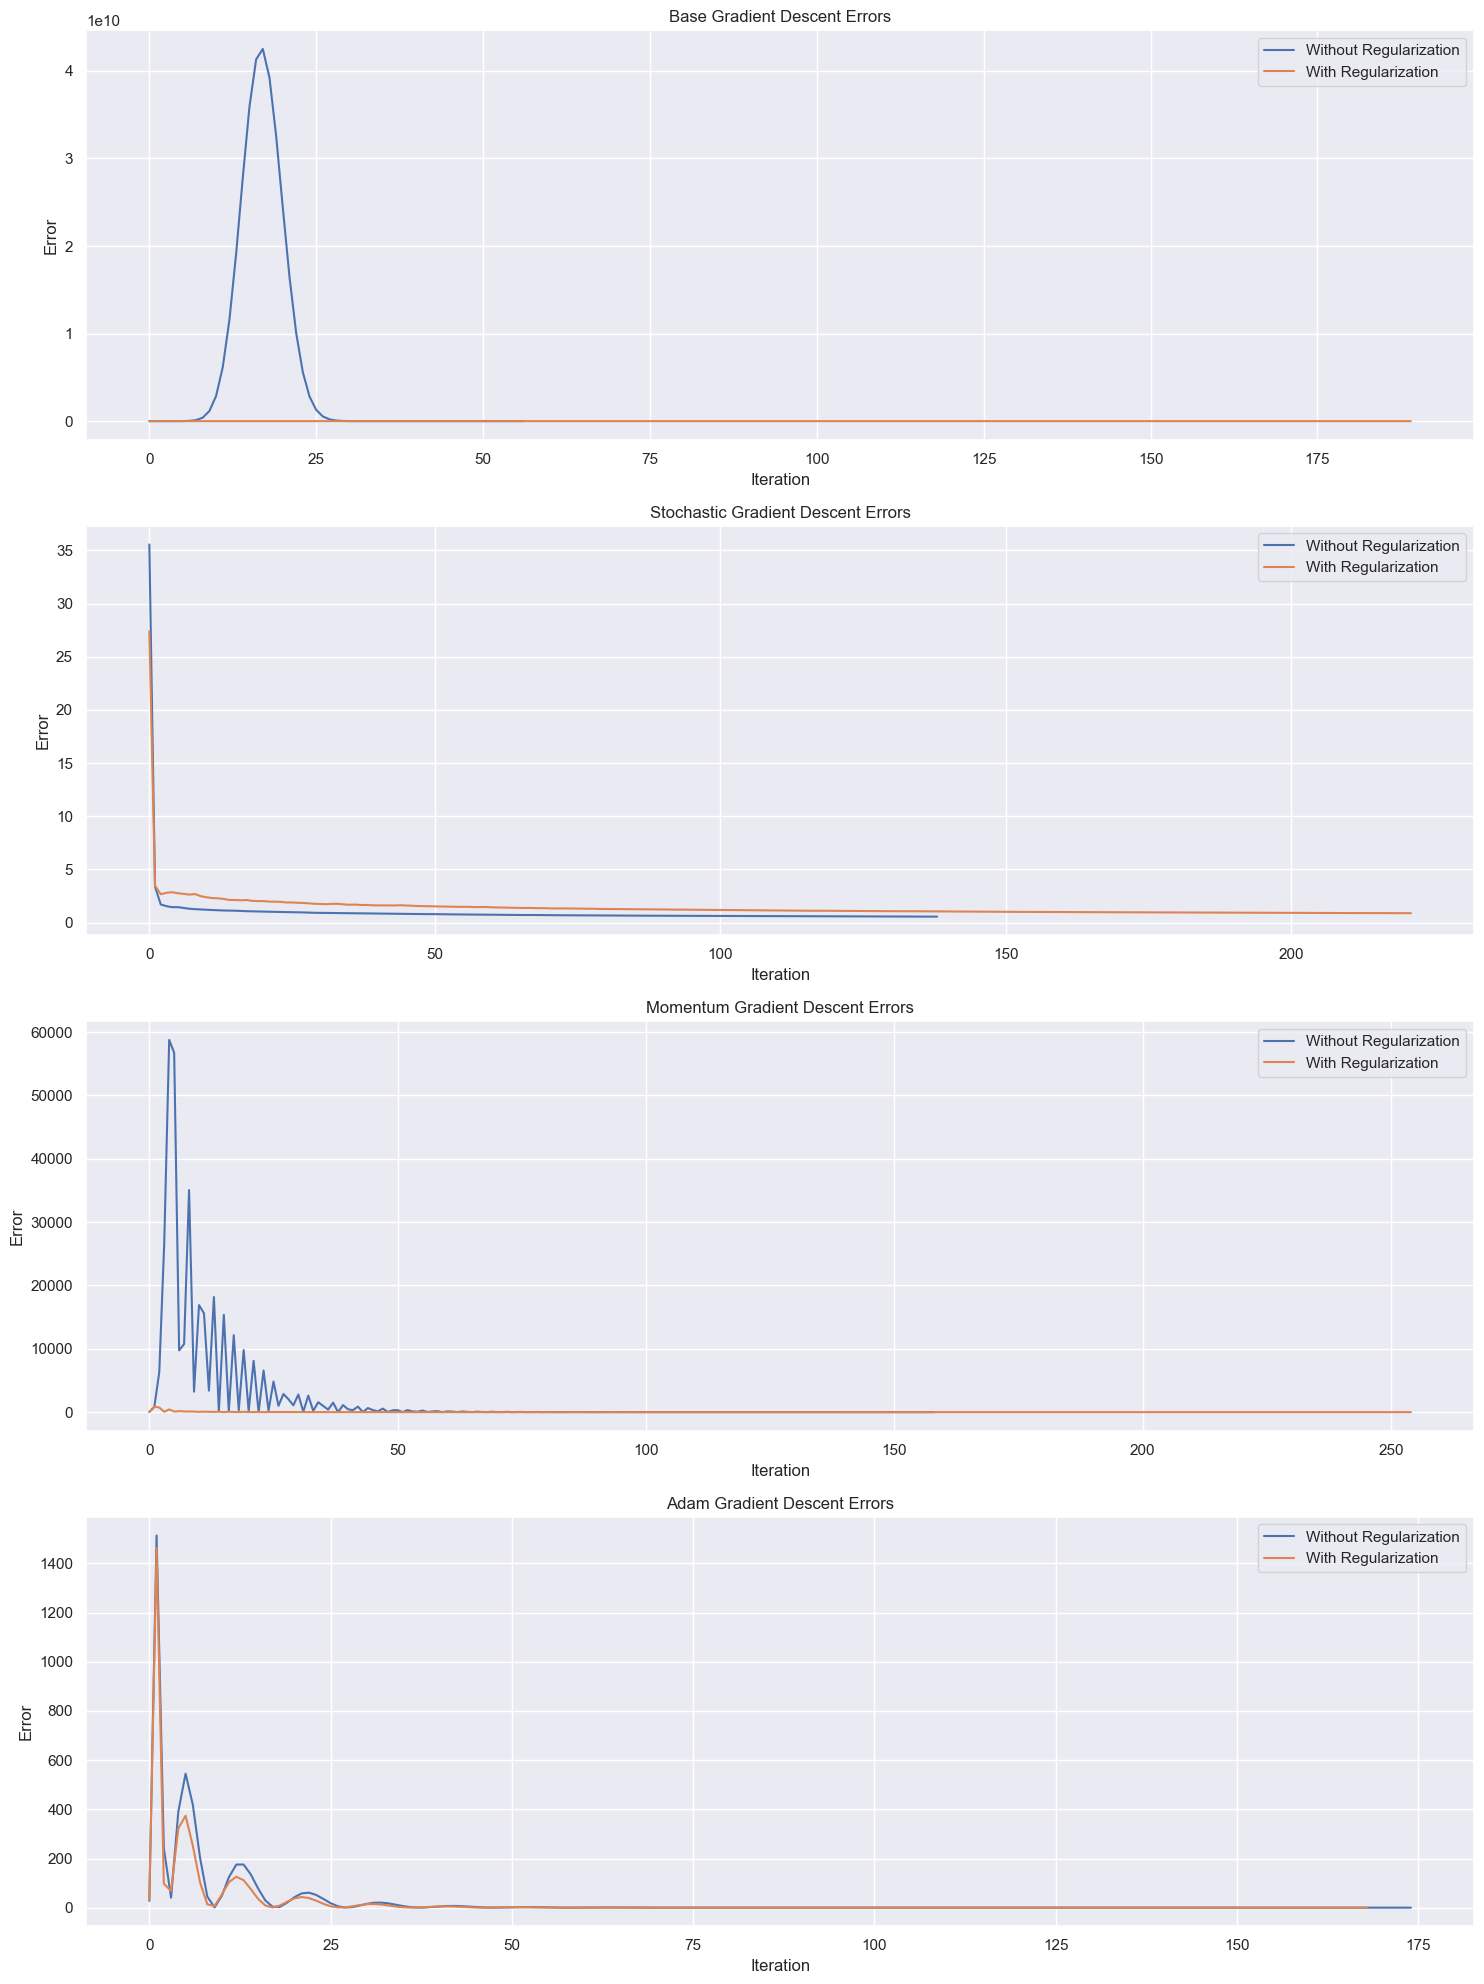

In [80]:
num_methods = len(ans)

# Создаем фигуру и оси с использованием subplots
fig, axes = plt.subplots(num_methods, 1, figsize=(15, num_methods * 5)) # num_methods строк, 1 колонка

# Названия для графиков
descent_titles = ['Base', 'Stochastic', 'Momentum', 'Adam']

for i in range(num_methods):
    # Ошибки для градиентного спуска без регуляризации
    errors = ans[i]
    axes[i].plot(errors, label='Without Regularization')
    
    # Ошибки для градиентного спуска с регуляризацией
    errors_reg = ans_reg[i]
    axes[i].plot(errors_reg, label='With Regularization')

    axes[i].set_title(f'{descent_titles[i]} Gradient Descent Errors')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Error')
    axes[i].legend()  # Добавляем легенду для различения линий

# Показываем все подграфики
plt.tight_layout()
plt.show()


* Можем видеть, что качество на **обычном градиентном спуске** умеренно упало, это может быть связано с тем, что модель не была переобучена и вводить штрафы за большие веса ей не требовалось. Примечательно, что регуляризация убрала "взрыв ошибки" (теперрь мы не перелетаем минимум, однако в связи с этим результаты модели сильно ухудшились.
* Если говорить о **стохастическом градиентном спуске**, то регуляризация *значительно* ухудшила его результаты. Это связано с тем, что регуляризация тормозит процесс сходимости, что и отражено на графике.
* Очевидно, что регуляризация положительно повлияла на **momentum и adam**, несколько улучшив их результат. Особенно заметно влияние на momentum. Его ошибка быстрее стабилизируется и выходит на ассимптоту, в целом ошибки значительно меньше. Adam также выходит на ассимптоту быстрее. Momentum и без того разработан для более быстрой сходимости, а регуляризация выступает дополнительным стимулом, еще более сглаживая движение градиентного спуска, а Adam дополнительно имеет механизм нивелирования негативного воздейтсвия регуляризации (адаптивный шаг), поэтому на этих типах спуска скор увеличивается. 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

$$ \nabla_w L = tanh(a - y)X $$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [81]:
res_log_cosh = []
for descent in ['full', 'stochastic','momentum', 'adam']:
    
    best_loss = np.inf
            
    for lamda_ in np.logspace(-6, 1, 10):
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': x_train.shape[1],
                'loss_function': LossFunction.LogCosh,
                'lambda_' : lamda_}}
        
        regression = LinearRegression(
        descent_config=descent_config)
        
        regression.fit(x_train.values, y_train.values)
        loss = regression.calc_loss(x_valid.values, y_valid.values)
        
        
        if loss < best_loss:
            method = descent
            best_loss = loss
            best_lambda = lamda_
            best_config = descent_config
            best_iter = (len(regression.loss_history) - 1)
            
    regression = LinearRegression(descent_config=best_config)
    regression.fit(x_test.values, y_test.values)
    best_r2 = r2_score(y_test.values, regression.predict(x_test.values))
    
    res_log_cosh.append({
            'method': method,
            'best_lambda': best_lambda,
            'best_loss': best_loss,
            'best_r2': best_r2,
            'best_iter': best_iter})

In [82]:
res_log_cosh_df = pd.DataFrame(res_log_cosh)
print('Ошибка LogCosh')
print(res_log_cosh_df)
print()
print('Ошибка MSE')
print(res_df)

Ошибка LogCosh
       method  best_lambda  best_loss   best_r2  best_iter
0        full         10.0   0.104611  0.771315        151
1  stochastic         10.0   0.104877  0.783036        300
2    momentum         10.0   0.088224  0.803168        216
3        adam         10.0   0.085904  0.809936        163

Ошибка MSE
       method  best_lambda  best_loss   best_r2  best_iter
0        full     1.668101   0.292027  0.755868         61
1  stochastic     0.278256   0.476787  0.590135        137
2    momentum     1.668101   0.240405  0.798078        158
3        adam    10.000000   0.230407  0.809983        197


***Очевидно, что в данном случае изменение функции потерь значительнее всего влияет на стохастический градиентный спуск, серьзно улучшая его качество. Связано это с некоторыми свойствами LogCosh Loss: Во-первых, она обеспечивает непрерывные и сглаженные градиенты, сочетая в себе свойства MSE для малых ошибок и MAE для больших, что помогает избежать резких изменений в обновлениях весов и уменьшает влияние выбросов. Это сглаживание делает SGD более устойчивым и предотвращает экстремальные обновления, которые могут возникать из-за случайности выборок данных. Во-вторых, LogCosh автоматически масштабирует градиенты, делая обновления более стабильными и плавными, а также предотвращает проблемы числовой стабильности благодаря логарифмическому трансформированию. Эти характеристики делают LogCosh идеальной для работы с зашумленными данными и обеспечивают более эффективное обучение с помощью SGD.***

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

![](маффины.jpg)

![image.png](маффины_2.jpg)

МАФФИНЫ НА КЕФИРЕ 🧁 

2 шт  яйцо


3/4 стакана сах.песок 


1 стакан кефир 3,2%


100 гр сл.масло 


260 гр мука


1 ч.л. сода


1ч.л разрыхлитель 


Капли шоколадные


——————————————


6 ст. л. Какао, если печем  шоколадные, муки в этом случае берём меньше 



📌 взбить сахар с яйцом , далее кефир и растопленное масло, взбиваем до полного растворения сахара 


📌 в отдельной миске смешиваем сухие ингредиенты, добавляем  в яичную массу и замешиваем тесто. Не должно  быть очень густым, консистенция как на пышные оладьи 


📌 далее высыпаем шоколадные капли


📌 наполняем формочки наполовину или чуть больше ( ~2 ст.л )


📌Выпекать на 180° ~ 30 мин

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

Для AdaMax:
$$
\begin{align*}
\text{for } t &= 1 \text{ to ... do} \\
g_t &\leftarrow \nabla_{\theta}f_t(\theta_{t-1}) \\
\text{if } \lambda \neq 0 \\
g_t &\leftarrow g_t + \lambda \theta_{t-1} \\
m_t &\leftarrow \beta_1 m_{t-1} + (1 - \beta_1)g_t \\
u_t &\leftarrow \max(\beta_2 u_{t-1}, |g_t| + \epsilon) \\
\theta_t &\leftarrow \theta_{t-1} - \frac{\eta}{1 - \beta_1^t} \frac{m_t}{u_t} \\
\end{align*}
$$
Источник: https://pytorch.org/docs/stable/generated/torch.optim.Adamax.html


Для Nadam:
$$
\begin{align*}
g_t &= \frac{\partial \text{(Loss)}}{\partial \theta_t} \\
m_t &= \beta_1 m_{t-1} + (1 - \beta_1)g_t \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t} \\
\theta_{t+1} &= \theta_t - \eta \frac{1}{\sqrt{\hat{V}_t + \epsilon}} \left( \beta_1 \hat{m}_t + \frac{(1 - \beta_1)g_t}{1 - \beta_1^t} \right)
\end{align*}
$$
Источник: https://russianblogs.com/article/27001602123/#8Nadam_115

Для AMSGrad
$$
\begin{align*}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1)g_t \\
V_t &= \beta_2 V_{t-1} + (1 - \beta_2)g_t^2 \\
\hat{V}_t &= \max(\hat{V}_{t-1}, V_t) \\
\theta_{t+1} &= \theta_t - \eta \frac{m_t}{\sqrt{\hat{V}_t} + \epsilon}
\end{align*}
$$
Источник: https://russianblogs.com/article/27001602123/#8Nadam_115

In [83]:
np.random.seed(10)
res_with_nadam = []
for descent in ['full', 'stochastic','momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:
    
    best_loss = np.inf
            
    for lamda_ in np.logspace(-6, 1, 10):
        descent_config = {
            'descent_name': descent,
            'kwargs': {
                'dimension': x_train.shape[1],
                'loss_function': LossFunction.MSE,
                'lambda_' : lamda_}}
        
        regression = LinearRegression(
        descent_config=descent_config)
        
        regression.fit(x_train.values, y_train.values)
        loss = regression.calc_loss(x_valid.values, y_valid.values)
        
        if loss < best_loss:
            method = descent
            best_loss = loss
            best_lambda = lamda_
            best_config = descent_config
            best_iter = (len(regression.loss_history) - 1)
            
    regression = LinearRegression(descent_config=best_config)
    regression.fit(x_test.values, y_test.values)
    best_r2 = r2_score(y_test.values, regression.predict(x_test.values))
    
    res_with_nadam.append({
            'method': method,
            'best_lambda': best_lambda,
            'best_loss': best_loss,
            'best_r2': best_r2,
            'best_iter': best_iter})

In [84]:
res_df = pd.DataFrame(res_with_nadam)
res_df

,method,best_lambda,best_loss,best_r2,best_iter
0,full,1.668101,0.296416,0.756178,65
1,stochastic,0.278256,0.525073,0.610394,116
2,momentum,1.668101,0.241339,0.797868,158
3,adam,10.000000,0.230444,0.809808,179
4,nadam,1.668101,0.230666,0.810069,188
5,adamax,1.668101,0.249886,0.783615,153
6,amsgrad,1.668101,0.298054,0.747119,162


In [85]:
ans = []
for k in range(len(res_with_nadam)):
    descent_config = {
            'descent_name': res_with_nadam[k]['method'],
            'kwargs': {'lambda_': res_with_nadam[k]['best_lambda'], 'dimension':x.shape[1]}
        }
    model = LinearRegression(descent_config)

    model.fit(x_train.values, y_train.values)
    
    ans.append(model.loss_history)

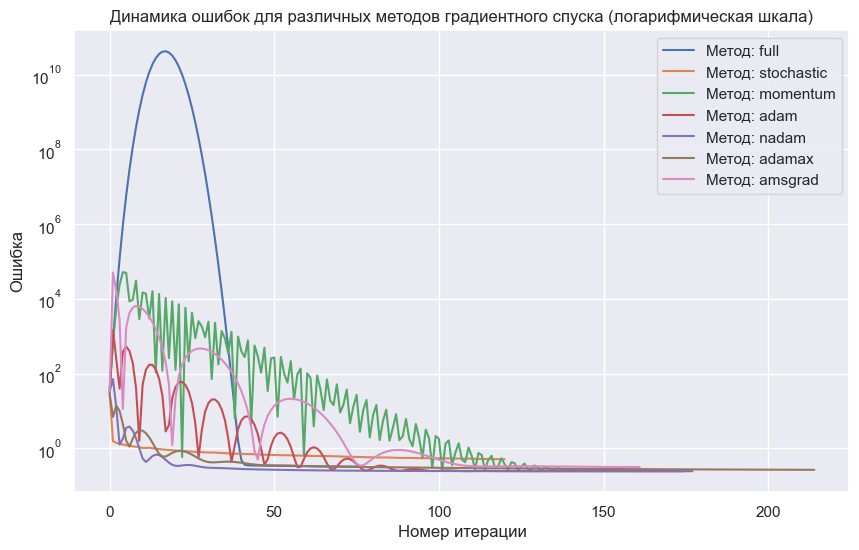

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

methods = ['full', 'stochastic','momentum', 'adam', 'nadam', 'adamax', 'amsgrad']

# Визуализируем историю ошибок с использованием логарифмической шкалы по оси Y
for i, loss_history in enumerate(ans):
    plt.plot(loss_history, label=f'Метод: {methods[i]}')

plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.title('Динамика ошибок для различных методов градиентного спуска (логарифмическая шкала)')
plt.yscale('log')  # Задаем логарифмический масштаб для оси Y
plt.legend()
plt.show()

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

Для Mean Absolute Error (MAE), функция потерь и ее градиент выражаются как:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

$$
\frac{\partial MAE}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}(\hat{y}_i - y_i) \cdot x_{ij}
$$

где $\text{sign}(\cdot)$ это функция знака, которая равна -1 если $(\hat{y}_i - y_i) < 0$, 0 если $(\hat{y}_i - y_i) = 0$, и 1 если $(\hat{y}_i - y_i) > 0$.

Для Huber Loss, функция потерь определяется кусочно и ее градиент зависит от значения ошибки по сравнению с порогом $\delta$:

$$
L_{\delta}(a) = 
\begin{cases} 
\frac{1}{2}a^2 & \text{для } |a| \leq \delta, \\
\delta (|a| - \frac{1}{2}\delta) & \text{для } |a| > \delta,
\end{cases}
$$

$$
\frac{\partial L_{\delta}}{\partial w_j} = 
\begin{cases} 
(y_i - \hat{y}_i) \cdot x_{ij} & \text{для } |y_i - \hat{y}_i| \leq \delta, \\
\delta \cdot \text{sign}(y_i - \hat{y}_i) \cdot x_{ij} & \text{для } |y_i - \hat{y}_i| > \delta.
\end{cases}
$$

где $a = y_i - \hat{y}_i$ — ошибка предсказания, $x_{ij}$ — значение $j$-го признака для $i$-го наблюдения.


Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [87]:
def results(loss_type):
    res = []
    for descent in ['full', 'stochastic','momentum', 'adam', 'nadam', 'adamax', 'amsgrad']:

        best_loss = np.inf

        for lamda_ in np.logspace(-6, 1, 10):
            descent_config = {
                'descent_name': descent,
                'kwargs': {
                    'dimension': x_train.shape[1],
                    'loss_function': loss_type,
                    'lambda_' : lamda_}}

            regression = LinearRegression(
            descent_config=descent_config)

            regression.fit(x_train.values, y_train.values)
            loss = regression.calc_loss(x_valid.values, y_valid.values)

            if loss < best_loss:
                method = descent
                best_loss = loss
                best_lambda = lamda_
                best_config = descent_config
                best_iter = (len(regression.loss_history) - 1)

        regression = LinearRegression(descent_config=best_config)
        regression.fit(x_test.values, y_test.values)
        best_r2 = r2_score(y_test.values, regression.predict(x_test.values))

        res.append({
                'method': method,
                'best_lambda': best_lambda,
                'best_loss': best_loss,
                'best_r2': best_r2,
                'best_iter': best_iter})
    return pd.DataFrame(res)

In [88]:
res_log_cosh = results(LossFunction.LogCosh)
res_huber = results(LossFunction.Huber)
res_mae = results(LossFunction.MAE)

In [89]:
res_df

,method,best_lambda,best_loss,best_r2,best_iter
0,full,1.668101,0.296416,0.756178,65
1,stochastic,0.278256,0.525073,0.610394,116
2,momentum,1.668101,0.241339,0.797868,158
3,adam,10.000000,0.230444,0.809808,179
4,nadam,1.668101,0.230666,0.810069,188
5,adamax,1.668101,0.249886,0.783615,153
6,amsgrad,1.668101,0.298054,0.747119,162


In [90]:
res_log_cosh

,method,best_lambda,best_loss,best_r2,best_iter
0,full,10.000000,0.103649,0.778593,152
1,stochastic,10.000000,0.101468,0.754198,300
2,momentum,10.000000,0.088252,0.804155,286
3,adam,10.000000,0.085921,0.809985,171
4,nadam,1.668101,0.085991,0.809776,174
5,adamax,10.000000,0.085963,0.809779,146
6,amsgrad,10.000000,0.085925,0.809430,222


In [91]:
res_huber

,method,best_lambda,best_loss,best_r2,best_iter
0,full,10.0,0.112584,0.775806,184
1,stochastic,10.0,0.112301,0.773498,300
2,momentum,10.0,0.095515,0.804642,235
3,adam,10.0,0.093472,0.810084,169
4,nadam,10.0,0.093497,0.810058,111
5,adamax,10.0,0.093521,0.809911,153
6,amsgrad,10.0,0.093489,0.810090,228


In [92]:
res_mae

,method,best_lambda,best_loss,best_r2,best_iter
0,full,1.668101,0.392162,0.690989,90
1,stochastic,1.668101,0.366462,0.761345,300
2,momentum,1.668101,0.317381,0.790549,150
3,adam,10.000000,0.305390,0.806089,300
4,nadam,1.668101,0.305602,0.805754,300
5,adamax,10.000000,0.305413,0.805467,300
6,amsgrad,1.668101,0.305388,0.805440,300


### Объяснения работы алгоритмов оптимизации с различными функциями потерь

- **Обычный градиентный спуск и Huber Loss**: Обычный градиентный спуск эффективен с функцией потерь Хьюбера, потому что она устойчива к выбросам, что важно, когда шаги обновления фиксированы и могут быть слишком большими из-за выбросов.

- **Stochastic Gradient Descent (SGD) и LogCosh Loss**: LogCosh обеспечивает более гладкие обновления по сравнению с MSE, что может быть полезно для SGD, который обновляет веса на основе небольших подвыборок и, следовательно, подвержен шуму в градиентах.

- **Momentum и Huber Loss**: Momentum помогает преодолевать локальные минимумы и ускорять сходимость. В сочетании с функцией потерь Хьюбера, которая уменьшает влияние выбросов, это способствует более эффективной и стабильной оптимизации.

- **Adam, Nadam, AdaMax и AMSGrad с Huber Loss**: Адаптивные алгоритмы оптимизации, такие как Adam и его вариации, отличаются индивидуальной корректировкой скорости обучения для каждого параметра. Huber Loss снижает влияние выбросов на эти корректировки, делая процесс обучения более устойчивым.

В целом, **Huber Loss** часто оказывается наилучшим выбором для наборов данных с выбросами. Эта функция потерь обеспечивает баланс между чувствительностью к выбросам и устойчивостью к ним, что делает ее идеальной для многих алгоритмов оптимизации. Результаты экспериментов показывают, что с Huber Loss качество обучения алгоритмов, таких как Adam, Nadam, AdaMax и AMSGrad, оказалось почти одинаковым, что подтверждает их способность эффективно работать с этой функцией потерь.
